<link rel="stylesheet" type="text/css" href="styles/styles.css">

# 1. Problem description

Using a dataset consisting of a list of Titanic passengers, build a model to predict whether a particular passenger survived or not, using information such as their age, gender, ticket fare, etc.

<link rel="stylesheet" type="text/css" href="styles/styles.css">

# 2. Data Analysis

Let's try to answer the following questions:
- _What is the structure of our datasets?_
- _What features are available in the datasets?_
- _Which features are numerical?_
- _Which features are categorical?_
- _Which features have mixed data types?_
- _Which features contain errors, typos, and/or missing and/or zero values?_
- _What are the data types of different features?_
- _How are numerical and non-numerical features distributed?_

In [2]:
# Importing libraries for data analysis
import pandas as pd
import numpy as np

In [3]:
# Data loading
train_df = pd.read_csv('data/train.csv', header=0)
test_df = pd.read_csv('data/test.csv', header=0)
# full_df = pd.concat((train_df, test_df), ignore_index=True)

In [22]:
# Output settings
# Output method for pd.DataFrame object
def _repr_html_styled_(self):
    styled_data = self.style.set_table_styles([
        {
            # Заголовки таблиц и индексы
            'selector': 'th', 
            'props': [
                ('font-family', 'Cascadia Mono PL'),    # шрифт 
                ('font-weight', '400'),                 # толщина текста
                ('color', '#f0a705'),                   # цвет текста
                ('opacity', '1'),                       # прозрачность текста
                ('background-color', '#fafafa'),        # цфет фона
                ('padding', '5px'),                     # отступы                
             ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#bababa'),
            ]
        },
        {
            # Содержимое ячеек
            'selector': 'td', 
            'props': [
                ('font-family', 'Cascadia Mono PL SemiLight'), 
                ('padding', '5px')
            ]
        },
        {
            # Четные строки содержимого таблицы
            'selector': 'tbody tr:nth-child(even)', 
            'props': [
                ('background-color', '#ffffff00')       # нет цвета ("прозрачные")
            ]
        },
        {
            # Цвет фона для нечетных строк (начиная со строки заголовка)
            'selector': 'tr:nth-of-type(odd)', 
            'props': [
                ('background-color', '#0000000a')
            ]
        },
        {
            # Стиль для индексов
            'selector': '.row_heading',
            'props': [
                ('color', '#bababa'),
            ]
        },
        
        {
            # Hover эффект для ячейки
            'selector': 'td:hover',
            'props': [
                ('background-color', '#d0def0'),
            ]
        },
          
    ])

    return styled_data._repr_html_()  # return HTML representation of styled data


# Redefining the output method of pd.DataFrame object
pd.DataFrame._repr_html_ = _repr_html_styled_

In [23]:
# Train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [183]:
# Test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,nan,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,nan,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,nan,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,nan,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,nan,S


In [184]:
# Train data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
# Test data info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [186]:
# Describe of numerical data of Train DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
# Describe of string (object) data of Train DataFrame
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [188]:
# Describe of numerical data of Test DataFrame
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [189]:
# Describe of string (object) data of Test DataFrame
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


<link rel="stylesheet" type="text/css" href="styles/styles.css">

# 3. Feature Engineering

Now that we have completed the data analysis, we can proceed to a more detailed examination and analysis of each feature, followed by processing, cleaning, and/or creating new features based on existing ones.

<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.0 Functions

In [190]:
# Function to split the data into train and test dataframes
def split_df(full_df):
    train_df = full_df.iloc[:891].reset_index(drop=True)
    test_df = full_df.iloc[891:].reset_index(drop=True).drop(['Survived'], axis = 1)
    train_df['Survived'] = train_df['Survived'].astype('int8')

    return train_df, test_df

<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.1 Pclass

In [191]:
# Survival rate of passengers in different classes
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [192]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

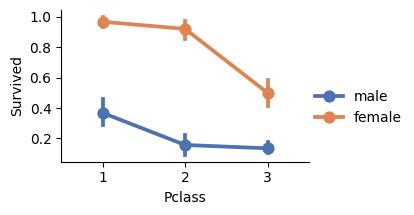

In [193]:
# Survival chart depending on passenger class for women and men
grid = sns.FacetGrid(train_df, height=2.25, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])
grid.add_legend();

<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.2 Sex

In [194]:
# Survival rates for women and men
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.3 Name

In [195]:
# Feature Name
train_df[['PassengerId', 'Name']].head(25)

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
5,6,"Moran, Mr. James"
6,7,"McCarthy, Mr. Timothy J"
7,8,"Palsson, Master. Gosta Leonard"
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,"Nasser, Mrs. Nicholas (Adele Achem)"


In [196]:
# Import a library for working with regular expressions
import re

In [197]:
# Splitting the Name feature into multiple features
# Regular expression for splitting the Name string into components
pattern = r'([^,]+),\s*([^.,]+)\.\s*(.*?)(?:\(([^)]+)\))?\s*(?:\"([^\"]+)\")?$'


# Function to split a string into substrings
def split_string(string: str) -> pd.Series:
    result = re.match(pattern, string)
    if result:
        substrings = result.groups()
        substrings = [s.strip() if isinstance(s, str) and s else np.NAN for s in substrings]
        return pd.Series(substrings)
    else:
        return pd.NA


# New features list
new_features = ['FamilyName', 'Title', 'FullName', 'MaidenName', 'ShortName']
for df in (train_df, test_df):
    # Applying the split string function to the Name column and creating new columns
    df[new_features] = df['Name'].apply(split_string)

In [198]:
# New features
train_df[['FamilyName', 'Title', 'FullName', 'MaidenName', 'ShortName']].head(25)

,FamilyName,Title,FullName,MaidenName,ShortName
0,Braund,Mr,Owen Harris,nan,nan
1,Cumings,Mrs,John Bradley,Florence Briggs Thayer,nan
2,Heikkinen,Miss,Laina,nan,nan
3,Futrelle,Mrs,Jacques Heath,Lily May Peel,nan
4,Allen,Mr,William Henry,nan,nan
5,Moran,Mr,James,nan,nan
6,McCarthy,Mr,Timothy J,nan,nan
7,Palsson,Master,Gosta Leonard,nan,nan
8,Johnson,Mrs,Oscar W,Elisabeth Vilhelmina Berg,nan
9,Nasser,Mrs,Nicholas,Adele Achem,nan


In [199]:
# Removing unuseless features
for df in (train_df, test_df):
    # Removing the Name feature
    df.drop(columns=['Name'], inplace=True)

    # Removing columns with many missing values and/or those that obviously cannot directly affect survival
    df.drop(columns=['FullName', 'MaidenName', 'ShortName'], inplace=True)

In [200]:
# Train data
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title
0,1,0,3,male,22.000000,1,0,A/5 21171,7.250000,nan,S,Braund,Mr
1,2,1,1,female,38.000000,1,0,PC 17599,71.283300,C85,C,Cumings,Mrs
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,Heikkinen,Miss
3,4,1,1,female,35.000000,1,0,113803,53.100000,C123,S,Futrelle,Mrs
4,5,0,3,male,35.000000,0,0,373450,8.050000,nan,S,Allen,Mr


In [201]:
# Test data
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title
0,892,3,male,34.500000,0,0,330911,7.829200,nan,Q,Kelly,Mr
1,893,3,female,47.000000,1,0,363272,7.000000,nan,S,Wilkes,Mrs
2,894,2,male,62.000000,0,0,240276,9.687500,nan,Q,Myles,Mr
3,895,3,male,27.000000,0,0,315154,8.662500,nan,S,Wirz,Mr
4,896,3,female,22.000000,1,1,3101298,12.287500,nan,S,Hirvonen,Mrs


In [202]:
# Cross-tabulation of the resulting Title feature and the Sex feature in the complete dataframe
full_df = pd.concat((train_df, test_df), ignore_index=True)
pd.crosstab(full_df['Title'], full_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [203]:
# Adjusting Title values
title_mapping = {
    'Capt': 'Mr', 
    'Col': 'Mr', 
    'Major': 'Mr', 
    'Don': 'Mr', 
    'Jonkheer': 'Mr', 
    'Sir': 'Mr',
    'Rev': 'Mr',
    'Mlle': 'Miss', 
    'Ms': 'Miss', 
    'Mme': 'Mrs', 
    'Lady': 'Mrs', 
    'Dona': 'Mrs', 
    'the Countess': 'Mrs'
}

for df in (train_df, test_df):
    df['Title'] = df['Title'].map(title_mapping).fillna(df['Title'])

    df.loc[(df['Title'] == 'Dr') & (df['Sex'] == 'male'), 'Title'] = 'Mr'
    df.loc[(df['Title'] == 'Dr') & (df['Sex'] == 'female'), 'Title'] = 'Miss'

    # Creating the title Missy (young Miss) in the Title feature for female passengers under 16 years old
    df.loc[(df['Age'] < 16) & (df['Title'] == 'Miss'), 'Title'] = 'Missy'

In [204]:
# Cross-tabulation of the resulting Title feature and the Sex feature
full_df = pd.concat((train_df, test_df), ignore_index=True)
pd.crosstab(full_df['Title'], full_df['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,211,0
Missy,54,0
Mr,0,782
Mrs,201,0


<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.4 Age

In [205]:
# Function for filling missing Age values
def fill_missing_age(data, title):
    # Get the index of rows where Age is missing and Title matches the given title
    null_index = data[(data['Title'] == title) & data['Age'].isnull()].index
    # Calculate the average and standard deviation of Age for the given title
    age_avg = data.loc[data['Title'] == title, 'Age'].mean()
    age_std = data.loc[data['Title'] == title, 'Age'].std()
    # Count the number of missing Age values for the given title
    age_null_count = data.loc[(data['Title'] == title) & data['Age'].isnull(), 'Age'].shape[0]
    # Generate random values within the range of (avg - std) to (avg + std) for filling missing Age
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Fill missing Age values with the generated random values for the given title
    data.loc[(data['Title'] == title) & data['Age'].isnull(), 'Age'] = age_null_random_list

    # Return the subset of data for verification
    # return data[['PassengerId', 'Age', 'Title']].loc[null_index].head()


full_df = pd.concat((train_df, test_df), ignore_index=True)
for title in ('Master', 'Mr', 'Miss', 'Mrs'):
    fill_missing_age(full_df, title)

train_df, test_df = split_df(full_df)

In [206]:
# Делим значения признака Age на 5 диапазонов
full_df["Age"] = full_df["Age"].astype(int)
full_df["CategoricalAge"] = pd.cut(full_df["Age"], 5, right=False)

# Разделяем данные на обучающий и тестовый наборы
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)

# Количество пассажиров в каждом диапазоне возраста
age_passenger_count = train_df["CategoricalAge"].value_counts()

# Корреляция CategoricalAge и Survived
correlation = train_df[["CategoricalAge", "Survived"]].groupby(["CategoricalAge"], as_index=False).mean()

# Добавление количества пассажиров в каждом диапазоне возраста
correlation["PassengerCount"] = correlation["CategoricalAge"].map(age_passenger_count)

correlation

,CategoricalAge,Survived,PassengerCount
0,"[0.0, 16.0)",0.586207,87
1,"[16.0, 32.0)",0.365741,432
2,"[32.0, 48.0)",0.339223,283
3,"[48.0, 64.0)",0.473684,76
4,"[64.0, 80.08)",0.076923,13


In [207]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,CategoricalAge
0,1,0.000000,3,male,22,1,0,A/5 21171,7.250000,nan,S,Braund,Mr,"[16.0, 32.0)"
1,2,1.000000,1,female,38,1,0,PC 17599,71.283300,C85,C,Cumings,Mrs,"[32.0, 48.0)"
2,3,1.000000,3,female,26,0,0,STON/O2. 3101282,7.925000,nan,S,Heikkinen,Miss,"[16.0, 32.0)"
3,4,1.000000,1,female,35,1,0,113803,53.100000,C123,S,Futrelle,Mrs,"[32.0, 48.0)"
4,5,0.000000,3,male,35,0,0,373450,8.050000,nan,S,Allen,Mr,"[32.0, 48.0)"


In [208]:
# Feature Age of Train data info
train_df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [209]:
# Feature Age of Test data info
test_df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Age
Non-Null Count  Dtype
--------------  -----
418 non-null    int32
dtypes: int32(1)
memory usage: 1.8 KB


In [210]:
train_df['Survived'].corr(train_df['Age'])

-0.09146105722576135

In [211]:
train_df['Survived'].corr(train_df['Pclass'])

-0.3384810359610148

In [212]:
# Creating new feature WomanWithKid
# Selecting women older than 16 years
women_df = full_df[(full_df['Sex'] == 'female') & (full_df['Age'] >= 16)]

# Selecting only those surnames that have children under 16 years old
kids_family_names = full_df[full_df['Age'] < 16]['FamilyName'].unique()

# Selecting women with surnames that have children under 16 years old
woman_with_kid_df = women_df[women_df['FamilyName'].isin(kids_family_names)]

# Assigning the value True to the WomanWithKid feature for selected women
full_df.loc[woman_with_kid_df.index, 'WomanWithKid'] = 1

# Filling missing values of the WomanWithKid feature with 0
full_df['WomanWithKid'].fillna(0, inplace=True)
full_df['WomanWithKid'] = full_df['WomanWithKid'].astype('int8')

# Splitting the data into training and testing sets
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)
train_df['Survived'] = train_df['Survived'].astype('int8')

In [213]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,CategoricalAge,WomanWithKid
0,1,0,3,male,22,1,0,A/5 21171,7.250000,nan,S,Braund,Mr,"[16.0, 32.0)",0
1,2,1,1,female,38,1,0,PC 17599,71.283300,C85,C,Cumings,Mrs,"[32.0, 48.0)",0
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.925000,nan,S,Heikkinen,Miss,"[16.0, 32.0)",0
3,4,1,1,female,35,1,0,113803,53.100000,C123,S,Futrelle,Mrs,"[32.0, 48.0)",0
4,5,0,3,male,35,0,0,373450,8.050000,nan,S,Allen,Mr,"[32.0, 48.0)",0


In [214]:
# Survival rates for women and men
train_df[['WomanWithKid', 'Survived']].groupby(['WomanWithKid'], as_index=False).mean()

,WomanWithKid,Survived
0,0,0.372010
1,1,0.563636


In [215]:
# Splitting the Age feature values into 5 ranges
full_df['Age'] = full_df['Age'].astype(int)
full_df['CategoricalAge'] = pd.cut(full_df['Age'], 5, right=False)

# Splitting the data into training and testing sets
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)
train_df['Survived'] = train_df['Survived'].astype('int8')

# Count of passengers in each age range
age_passenger_count = train_df['CategoricalAge'].value_counts()

# Correlation between CategoricalAge and Survived
survivor_ratio_df = train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

# Adding the count of passengers in each age range
survivor_ratio_df['PassengerCount'] = survivor_ratio_df['CategoricalAge'].map(age_passenger_count)

survivor_ratio_df

,CategoricalAge,Survived,PassengerCount
0,"[0.0, 16.0)",0.586207,87
1,"[16.0, 32.0)",0.365741,432
2,"[32.0, 48.0)",0.339223,283
3,"[48.0, 64.0)",0.473684,76
4,"[64.0, 80.08)",0.076923,13


<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.5 Fare

In [216]:
# Пропущенные значения признака Fare с номером билета Ticket
full_df = pd.concat((train_df, test_df), ignore_index=True)
missing_fare = full_df[full_df['Fare'].isnull()]
missing_fare[['PassengerId', 'Fare']]

,PassengerId,Fare
1043,1044,nan


In [217]:
# Passengers with Ticket = missing_fare
passenger_id = missing_fare['PassengerId'].values[0]  # get PassengerId from the first row of missing_fare
ticket = full_df[full_df['PassengerId'] == passenger_id]['Ticket'].values[0]  # get the Ticket value for this passenger
passengers_with_same_ticket = full_df[full_df['Ticket'] == ticket]  # filter data by Ticket value

passengers_with_same_ticket[['PassengerId', 'Ticket']]

,PassengerId,Ticket
1043,1044,3701


In [218]:
# Fill missing Fare values
# Calculating the median fare for passengers in the 3rd class
median_fare_pclass_3 = full_df[full_df['Pclass'] == 3]['Fare'].median()

# Filling missing value with the median value
full_df.loc[(full_df['Pclass'] == 3) & full_df['Fare'].isnull(), 'Fare'] = median_fare_pclass_3

full_df[full_df['PassengerId'] == passenger_id][['PassengerId', 'Fare']]

,PassengerId,Fare
1043,1044,8.050000


In [219]:
# Cost calculation per person
persons_in_ticket = full_df.groupby('Ticket').size()
full_df['PersonsInTicket'] = full_df['Ticket'].map(persons_in_ticket)
full_df['Cost'] = (full_df['Fare'] / full_df['PersonsInTicket']).round(2)

full_df[[ 'Fare', 'PersonsInTicket', 'Cost']].head()

,Fare,PersonsInTicket,Cost
0,7.250000,1,7.250000
1,71.283300,2,35.640000
2,7.925000,1,7.920000
3,53.100000,2,26.550000
4,8.050000,1,8.050000


In [220]:
# Splitting the data into training and testing sets
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)
train_df['Survived'] = train_df['Survived'].astype('int8')

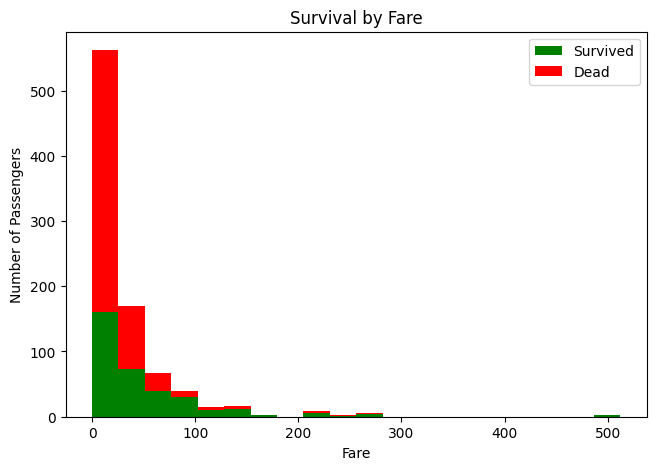

In [221]:
# Гистограммы
plt.figure(figsize=(7.5, 5))
plt.hist([train_df[train_df['Survived'] == 1]['Fare'], train_df[train_df['Survived'] == 0]['Fare']], 
         bins=20, stacked=True, color=['g','r'], label=['Survived','Dead'])

# Настройка графика
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Survival by Fare')
plt.legend()

# Отображение гистограммы
plt.show()

In [222]:
train_df['FareLog'] = train_df['Fare'].apply(lambda fare: round(np.log2(fare + 1), 2))
test_df['FareLog'] = test_df['Fare'].apply(lambda fare: round(np.log2(fare + 1), 2))

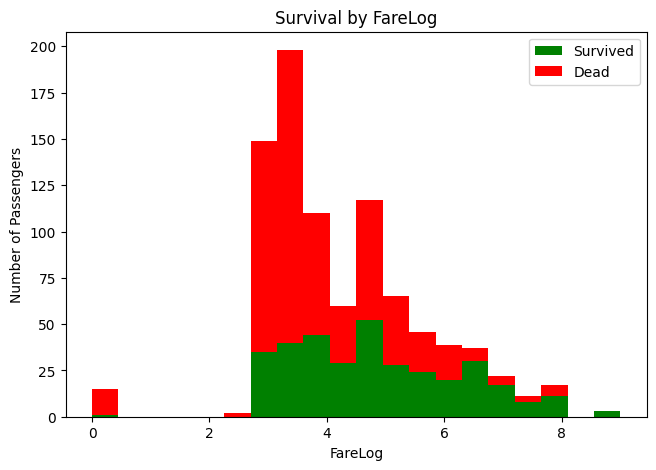

In [223]:
# Гистограммы
plt.figure(figsize=(7.5, 5))
plt.hist([train_df[train_df['Survived'] == 1]['FareLog'], train_df[train_df['Survived'] == 0]['FareLog']], 
         bins=20, stacked=True, color=['g','r'], label=['Survived','Dead'])

# Настройка графика
plt.xlabel('FareLog')
plt.ylabel('Number of Passengers')
plt.title('Survival by FareLog')
plt.legend()

# Отображение гистограммы
plt.show()

In [224]:
train_df['Survived'].corr(train_df['Fare'])

0.2573065223849622

In [225]:
train_df['Survived'].corr(train_df['FareLog'])

0.3299811710112363

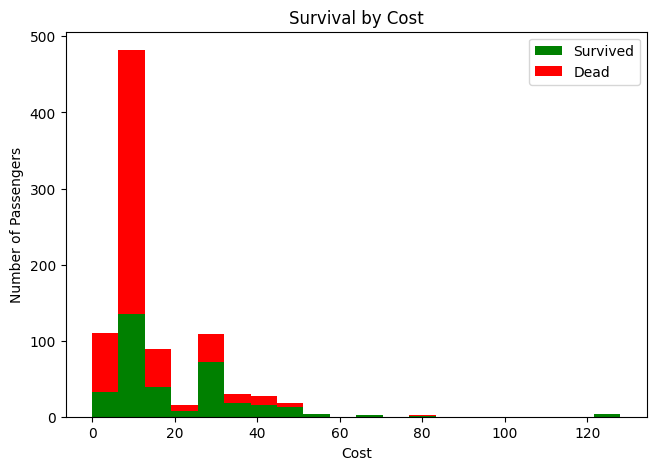

In [226]:
# Гистограммы
plt.figure(figsize=(7.5, 5))
plt.hist([train_df[train_df['Survived'] == 1]['Cost'], train_df[train_df['Survived'] == 0]['Cost']], 
         bins=20, stacked=True, color=['g','r'], label=['Survived','Dead'])

# Настройка графика
plt.xlabel('Cost')
plt.ylabel('Number of Passengers')
plt.title('Survival by Cost')
plt.legend()

# Отображение гистограммы
plt.show()

In [227]:
train_df['CostLog'] = train_df['Cost'].apply(lambda cost: round(np.log2(cost + 1), 2))
test_df['CostLog'] = test_df['Cost'].apply(lambda cost: round(np.log2(cost + 1), 2))

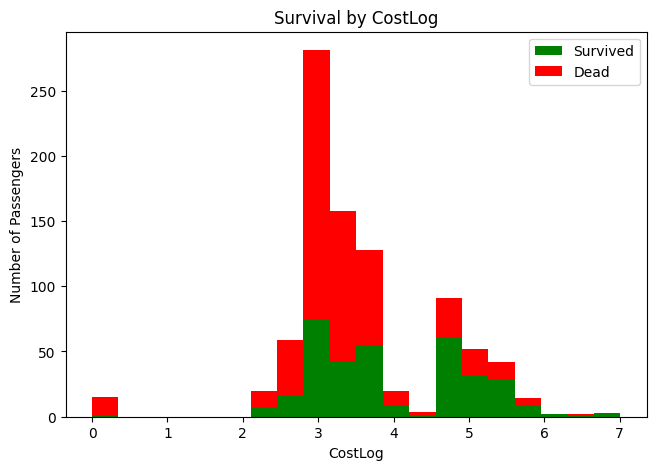

In [228]:
# Гистограммы
plt.figure(figsize=(7.5, 5))
plt.hist([train_df[train_df['Survived'] == 1]['CostLog'], train_df[train_df['Survived'] == 0]['CostLog']], 
         bins=20, stacked=True, color=['g','r'], label=['Survived','Dead'])

# Настройка графика
plt.xlabel('CostLog')
plt.ylabel('Number of Passengers')
plt.title('Survival by CostLog')
plt.legend()

# Отображение гистограммы
plt.show()

In [229]:
train_df['Survived'].corr(train_df['Cost'])

0.28833080835221936

In [230]:
train_df['Survived'].corr(train_df['CostLog'])

0.3064412795913383

In [231]:
full_df = pd.concat((train_df, test_df), ignore_index=True)

In [232]:
# Делим значения признака CategoricalFare на диаппазоны
# Округляем значения столбца Fare до целого числа
full_df["Fare"] = full_df["Fare"].round().astype(int)
full_df["CategoricalFare"] = pd.qcut(full_df["Fare"], 4)

# Разделяем данные на обучающий и тестовый наборы
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)

# Количество пассажиров в каждом диапазоне возраста
age_passenger_count = train_df["CategoricalFare"].value_counts()

# Корреляция CategoricalAge и Survived
correlation = train_df[["CategoricalFare", "Survived"]].groupby(["CategoricalFare"], as_index=False).mean()

# Добавление количества пассажиров в каждом диапазоне возраста
correlation["PassengerCount"] = correlation["CategoricalFare"].map(age_passenger_count)

pd.set_option('display.max_colwidth', None)  # максимальная ширина колонки
correlation

,CategoricalFare,Survived,PassengerCount
0,"(-0.001, 8.0]",0.201365,293
1,"(8.0, 14.0]",0.335366,164
2,"(14.0, 31.0]",0.457399,223
3,"(31.0, 512.0]",0.597156,211


In [233]:
# Делим значения признака CategoricalCost на диапазоны для каждого класса Pclass
# Округляем значения столбца Cost до целого числа
full_df["Cost"] = full_df["Cost"].round().astype(int)

# Создаем условия для категоризации каждого класса Pclass
conditions = [
    (full_df["Pclass"] == 1),
    (full_df["Pclass"] == 2),
    (full_df["Pclass"] == 3)
]

# Задаем категории для каждого класса Pclass
categories = [
    pd.qcut(full_df[conditions[0]]["Cost"], 3, labels=[1, 2, 3], duplicates='drop'),
    pd.qcut(full_df[conditions[1]]["Cost"], 3, labels=[4, 5, 6], duplicates='drop'),
    pd.qcut(full_df[conditions[2]]["Cost"], 3, labels=[7, 8, 9], duplicates='drop')
]

# Объединяем категории для всех классов Pclass
full_df["CategoricalCost"] = pd.concat(categories)

# Выводим первые несколько строк для проверки результатов
full_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,CategoricalAge,WomanWithKid,PersonsInTicket,Cost,FareLog,CostLog,CategoricalFare,CategoricalCost
0,1,0.000000,3,male,22,1,0,A/5 21171,7,nan,S,Braund,Mr,"[16.0, 32.0)",0,1,7,3.040000,3.040000,"(-0.001, 8.0]",7
1,2,1.000000,1,female,38,1,0,PC 17599,71,C85,C,Cumings,Mrs,"[32.0, 48.0)",0,2,36,6.180000,5.200000,"(31.0, 512.0]",2
2,3,1.000000,3,female,26,0,0,STON/O2. 3101282,8,nan,S,Heikkinen,Miss,"[16.0, 32.0)",0,1,8,3.160000,3.160000,"(-0.001, 8.0]",8
3,4,1.000000,1,female,35,1,0,113803,53,C123,S,Futrelle,Mrs,"[32.0, 48.0)",0,2,27,5.760000,4.780000,"(31.0, 512.0]",1
4,5,0.000000,3,male,35,0,0,373450,8,nan,S,Allen,Mr,"[32.0, 48.0)",0,1,8,3.180000,3.180000,"(-0.001, 8.0]",8


In [234]:
train_df['Survived'].corr(train_df['Cost'])

0.28833080835221936

<link rel="stylesheet" type="text/css" href="styles/styles.css">

### 3.7 Embarked

In [235]:
# Пассажиры у которых отсутствуют значения Embarked
missing_embarked = full_df[full_df["Embarked"].isnull()]
missing_embarked[["PassengerId", "Embarked"]]

,PassengerId,Embarked
61,62,nan
829,830,nan


In [236]:
# Заполняем отсутствующие значения Embarked
full_df["Embarked"] = full_df["Embarked"].fillna("S")

In [237]:
# Разделяем данные на обучающий и тестовый наборы
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)

# Корреляция Embarked и Survived
train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [238]:
# Преобразовываем значения признаков в числа
# Преобразовываем значения признака Sex в 0 и 1
sex_mapping = {"female": 1, "male": 0}
full_df["Sex"] = full_df["Sex"].map(sex_mapping).astype(int)

# Преобразовываем значения признака Title в 0 и 1
title_mapping = {"Mr": 1, "Miss": 2, "Missy": 3, "Mrs": 4, "Master": 5}
full_df["Title"] = full_df["Title"].map(title_mapping).astype(int)

# Преобразовываем значения признака Embarked в 0, 1 и 2
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
full_df["Embarked"] = full_df["Embarked"].map(embarked_mapping).astype(int)

# Замена категориальных значений на числовые коды
full_df["CategoricalAge"] = full_df["CategoricalAge"].cat.codes + 1

# Замена категориальных значений на числовые коды
# full_df["CategoricalCost"] = full_df["CategoricalCost"].cat.codes + 1
# full_df["CategoricalCost"] = full_df["CategoricalCost"]

# Замена категориальных значений на числовые коды
full_df["CategoricalFare"] = full_df["CategoricalFare"].cat.codes + 1

# Разделяем данные на обучающий и тестовый наборы
train_df = full_df.iloc[:891].reset_index(drop=True)
test_df = full_df.iloc[891:].reset_index(drop=True)

# Удалеение признаков котрые использовалить в процессе анализа данных и более не требуются
# full_df = full_df.drop(["CategoricalAge", "CategoricalFare", "CategoricalCost"], axis = 1)

In [239]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyName,Title,CategoricalAge,WomanWithKid,PersonsInTicket,Cost,FareLog,CostLog,CategoricalFare,CategoricalCost
0,1,0.000000,3,0,22,1,0,A/5 21171,7,nan,1,Braund,1,2,0,1,7,3.040000,3.040000,1,7
1,2,1.000000,1,1,38,1,0,PC 17599,71,C85,2,Cumings,4,3,0,2,36,6.180000,5.200000,4,2
2,3,1.000000,3,1,26,0,0,STON/O2. 3101282,8,nan,1,Heikkinen,2,2,0,1,8,3.160000,3.160000,1,8
3,4,1.000000,1,1,35,1,0,113803,53,C123,1,Futrelle,4,3,0,2,27,5.760000,4.780000,4,1
4,5,0.000000,3,0,35,0,0,373450,8,nan,1,Allen,1,3,0,1,8,3.180000,3.180000,1,8


In [240]:
final_df = full_df.drop(['PassengerId', "SibSp", "Parch", "Ticket", "Cabin", "Ticket", 'FamilyName'], axis = 1)

In [241]:
# Разделяем данные на обучающий и тестовый наборы
train_df = final_df.iloc[:891].reset_index(drop=True)
test_df = final_df.iloc[891:].reset_index(drop=True)
y_test = pd.read_csv('data/titanic_y_test.csv', header=0)

# Удалить столбец "Survived" из test_df
test_df = test_df.drop(columns=['Survived'])

# Загрузить y_test
y_test = pd.read_csv('data/titanic_y_test.csv', header=0)

# Объединить test_df и y_test по индексу
test_df_with_y_test = test_df.join(y_test)
data = pd.concat((train_df, test_df_with_y_test), ignore_index=True)
# Сохраняем DataFrame в файл CSV
data.to_csv('data/titanic_full_cleared_v2.csv', index=False)
train_df['Survived'] = train_df['Survived'].astype('int8')

In [242]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,CategoricalAge,WomanWithKid,PersonsInTicket,Cost,FareLog,CostLog,CategoricalFare,CategoricalCost
0,0,3,0,22,7,1,1,2,0,1,7,3.040000,3.040000,1,7
1,1,1,1,38,71,2,4,3,0,2,36,6.180000,5.200000,4,2
2,1,3,1,26,8,1,2,2,0,1,8,3.160000,3.160000,1,8
3,1,1,1,35,53,1,4,3,0,2,27,5.760000,4.780000,4,1
4,0,3,0,35,8,1,1,3,0,1,8,3.180000,3.180000,1,8


In [243]:
train_df['Survived'].corr(train_df['CategoricalFare'])

0.3152180351206851

In [244]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,CategoricalAge,WomanWithKid,PersonsInTicket,Cost,FareLog,CostLog,CategoricalFare,CategoricalCost
0,3,0,34,8,3,1,3,0,1,8,3.140000,3.140000,1,8
1,3,1,47,7,1,4,3,0,1,7,3.000000,3.000000,1,7
2,2,0,62,10,3,1,4,0,1,10,3.420000,3.420000,2,4
3,3,0,27,9,1,1,2,0,1,9,3.270000,3.270000,2,9
4,3,1,22,12,1,4,2,1,2,6,3.730000,2.840000,2,7


In [245]:
train_df = train_df.drop(["Age", "Fare", "CategoricalAge", "PersonsInTicket", "Cost", 'CategoricalFare'], axis = 1)
test_df = test_df.drop(["Age", "Fare", "CategoricalAge", "PersonsInTicket", "Cost", 'CategoricalFare'], axis = 1)

In [246]:
train_df = train_df.astype('int8')
test_df = test_df.astype('int8')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int8 
 1   Pclass           891 non-null    int8 
 2   Sex              891 non-null    int8 
 3   Embarked         891 non-null    int8 
 4   Title            891 non-null    int8 
 5   WomanWithKid     891 non-null    int8 
 6   FareLog          891 non-null    int8 
 7   CostLog          891 non-null    int8 
 8   CategoricalCost  891 non-null    int8 
dtypes: int8(9)
memory usage: 8.0 KB


In [247]:
test_df.head()

,Pclass,Sex,Embarked,Title,WomanWithKid,FareLog,CostLog,CategoricalCost
0,3,0,3,1,0,3,3,8
1,3,1,1,4,0,3,3,7
2,2,0,3,1,0,3,3,4
3,3,0,1,1,0,3,3,9
4,3,1,1,4,1,3,2,7


In [248]:
# Импорт библиотек для машинного обучения
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score

In [249]:
# Сравнение классификаторов
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

# Создание DataFrame для хранения результатов
log_cols = ["Classifier", "Accuracy", "Precision"]
log = pd.DataFrame(columns=log_cols)

# Определение тренировочной выборки X и вектора целевых значений y
X_train = train_df.drop("Survived", axis=1)  # удаляем столбец Survived из тренировочных данных
y_train = train_df["Survived"]  # используем столбец "Survived" как вектор целевых значений

# Итерация по классификаторам и оценка их точности с использованием cross_val_score
for clf in classifiers:
    name = clf.__class__.__name__
    accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision').mean()
    log_entry = pd.DataFrame([[name, accuracy, precision]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

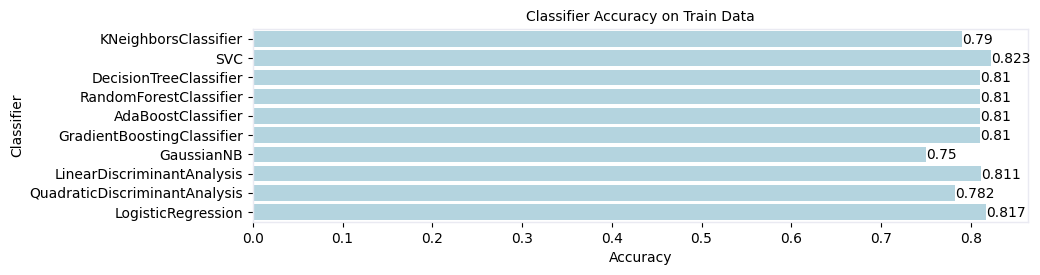

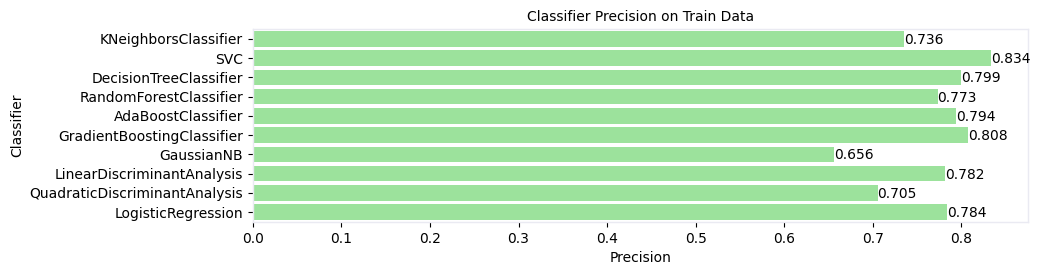

In [250]:
# Диаграммы доли правильных/точности классификаторов
# Диаграмма доли правильных
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Accuracy', y='Classifier', data=log, color='lightblue', linewidth=0)
plt.xlabel('Accuracy', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Accuracy on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения доли правильных ответов в каждый столбец
for index, value in enumerate(log['Accuracy']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)
    
# Диаграмма точности
plt.figure(figsize=(10, 2.5))
ax = sns.barplot(x='Precision', y='Classifier', data=log, color='lightgreen', linewidth=0)
plt.xlabel('Precision', fontsize=10)
plt.ylabel('Classifier', fontsize=10)
plt.title('Classifier Precision on Train Data', fontsize=10)

# Изменение цвета и толщины рамок осей
for spine in ax.spines.values():
    spine.set_color('#eaeaf2')  # цвет рамки
    spine.set_linewidth(1.0)    # толщина рамки

# Изменение цвета вертикальных линий на оси X
ax.xaxis.grid(False)

# Установка размера шрифта на шкале
plt.tick_params(axis='both', which='major', labelsize=10)

# Добавляем значения точности в каждый столбец
for index, value in enumerate(log['Precision']):
    plt.text(value, index + 0.25, str(round(value, 3)), fontsize=10)